In [2]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")
import os
os.chdir(r'C:\Users\Hp\Downloads\Forecasting')

In [3]:
data=pd.read_csv("india.csv") 
data.columns

Index(['Datetime', 'Confirmed'], dtype='object')

In [4]:
data.head()

,Datetime,Confirmed
0,2020-01-30T13:33:00.00+05:30,1
1,2020-02-02T10:39:00.00+05:30,2
2,2020-02-03T12:13:00.00+05:30,3
3,2020-03-02T14:28:00.00+05:30,5
4,2020-03-03T19:36:00.00+05:30,6


In [5]:
data['Datetime']=pd.to_datetime(data.Datetime)

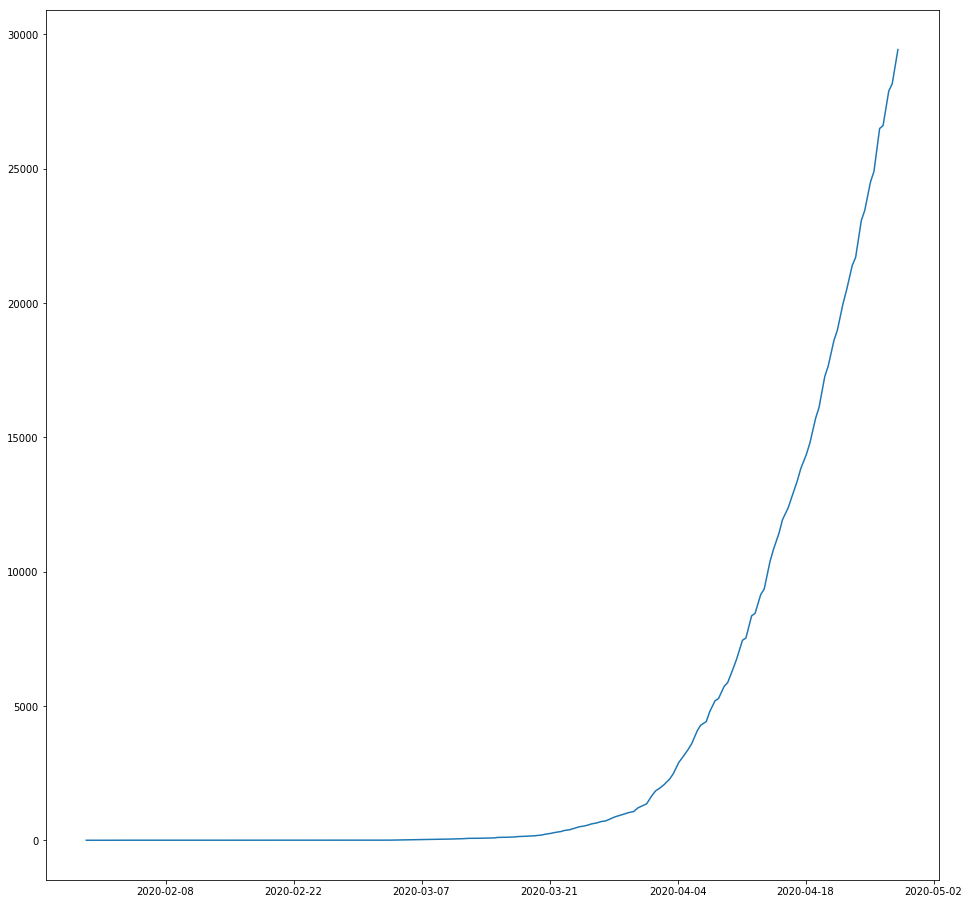

In [6]:
data.index=data['Datetime']
ts = data['Confirmed'] 
plt.figure(figsize=(16,16))
plt.plot(ts) 


In [7]:
daily = data.resample('D').mean() 

In [8]:
daily['Confirmed']=daily['Confirmed'].replace(np.nan,0)

In [9]:
daily

,Confirmed
Datetime,
2020-01-30,1.0
2020-01-31,0.0
2020-02-01,0.0
2020-02-02,2.0
2020-02-03,3.0
2020-02-04,0.0
2020-02-05,0.0
2020-02-06,0.0
2020-02-07,0.0


In [23]:
#plt.figure(figsize=(16,16))
#plt.plot(daily) 

In [10]:
Train=daily.ix['2020-01-30':'2020-04-28'] 
#valid=daily.ix['2020-04-27':'2020-04-28']

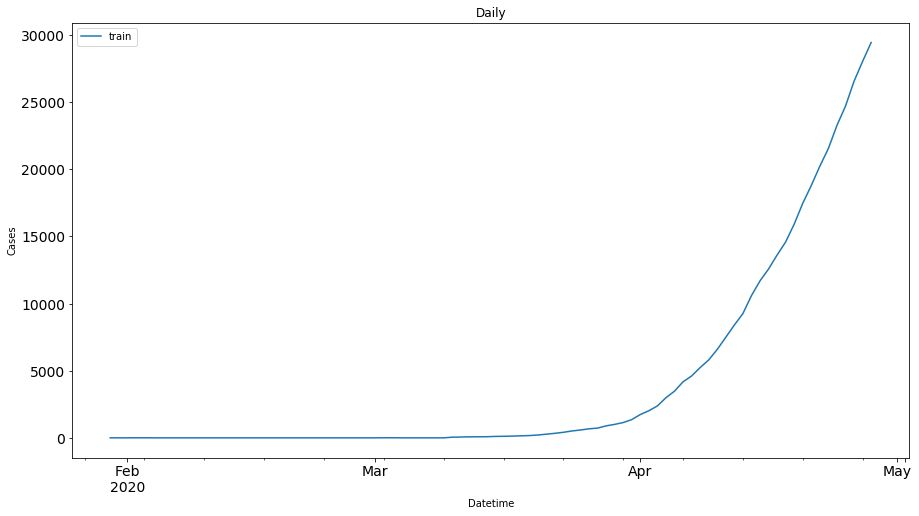

In [11]:
Train.Confirmed.plot(figsize=(15,8), title= 'Daily', fontsize=14, label='train') 
#valid.Confirmed.plot(figsize=(15,8), title= 'Daily', fontsize=14, label='valid')
plt.xlabel("Datetime") 
plt.ylabel("Cases") 
plt.legend(loc='best') 
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Confirmed, y_hat.naive)) 
print(rms)

NameError: name 'valid' is not defined

In [13]:
import itertools
p=d=q=range(0,4)
pdq = list(itertools.product(p,d,q))
#pdq

In [14]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(Train.Confirmed,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1865.0102593569989
(0, 0, 1) 1753.6143731135844
(0, 0, 3) 1567.4212660990277
(0, 1, 0) 1369.1167011574512
(0, 1, 1) 1293.758028582215
(0, 1, 2) 1236.0457669630107
(0, 1, 3) 1196.0038456295194
(0, 2, 0) 1112.4211791787864
(0, 2, 1) 1090.6817649413374
(0, 2, 2) 1090.9473188291988
(0, 2, 3) 1092.1039677059175
(1, 0, 0) 1437.45380466139
(1, 1, 0) 1130.566971725319
(1, 2, 0) 1088.7678778446561
(1, 2, 1) 1090.2907636137788
(1, 2, 2) 1091.8230207858724
(1, 2, 3) 1093.5926746536163
(2, 1, 0) 1110.3592895376596
(2, 2, 0) 1090.5019945141626
(2, 2, 1) 1092.009201858672
(2, 2, 2) 1093.7624696771559
(2, 2, 3) 1086.0797655877614
(3, 1, 0) 1112.3406800288105
(3, 2, 0) 1091.7128064786134
(3, 2, 1) 1093.3784354089917
(3, 2, 2) 1108.6054263055476


In [15]:
model_arima = ARIMA(Train.Confirmed,order=(2, 2, 3))
model_arima_fit = model_arima.fit()

In [16]:
predictions= model_arima_fit.forecast(steps=15)[0]
predictions

array([30949.57348617, 32356.69150752, 33867.63503282, 35469.81703443,
       37032.82630139, 38568.55623593, 40157.37226489, 41789.38403888,
       43415.14719024, 45042.33968108, 46701.33178573, 48386.4150201 ,
       50078.96621935, 51783.10516491, 53510.2321769 ])

In [19]:
predictions=pd.DataFrame(predictions)
predictions['Date']=['4/29/2020','4/30/2020','5/1/2020','5/2/2020','5/3/2020',
                   '5/4/2020','5/5/2020','5/6/2020','5/7/2020','5/8/2020',
                   '5/9/2020','5/10/2020','5/11/2020','5/12/2020','5/13/2020']
predictions['Date']=pd.to_datetime(predictions.Date)
predictions.index=predictions.Date

In [24]:
predictions[0]=predictions[0].astype(int)

In [25]:
predictions[0]

Date
2020-04-29    30949
2020-04-30    32356
2020-05-01    33867
2020-05-02    35469
2020-05-03    37032
2020-05-04    38568
2020-05-05    40157
2020-05-06    41789
2020-05-07    43415
2020-05-08    45042
2020-05-09    46701
2020-05-10    48386
2020-05-11    50078
2020-05-12    51783
2020-05-13    53510
Name: 0, dtype: int32

In [31]:
Train.Confirmed[50:]

Datetime
2020-03-20      209.00
2020-03-21      270.50
2020-03-22      336.00
2020-03-23      411.75
2020-03-24      510.00
2020-03-25      584.00
2020-03-26      671.50
2020-03-27      724.00
2020-03-28      891.00
2020-03-29     1001.50
2020-03-30     1138.00
2020-03-31     1359.00
2020-04-01     1735.50
2020-04-02     2017.00
2020-04-03     2376.50
2020-04-04     2987.00
2020-04-05     3475.50
2020-04-06     4174.00
2020-04-07     4605.00
2020-04-08     5234.00
2020-04-09     5799.50
2020-04-10     6586.50
2020-04-11     7488.00
2020-04-12     8401.50
2020-04-13     9252.00
2020-04-14    10589.00
2020-04-15    11686.00
2020-04-16    12569.50
2020-04-17    13611.00
2020-04-18    14585.00
2020-04-19    15914.00
2020-04-20    17460.50
2020-04-21    18793.00
2020-04-22    20227.50
2020-04-23    21546.50
2020-04-24    23264.50
2020-04-25    24699.50
2020-04-26    26550.50
2020-04-27    28026.00
2020-04-28    29435.00
Freq: D, Name: Confirmed, dtype: float64

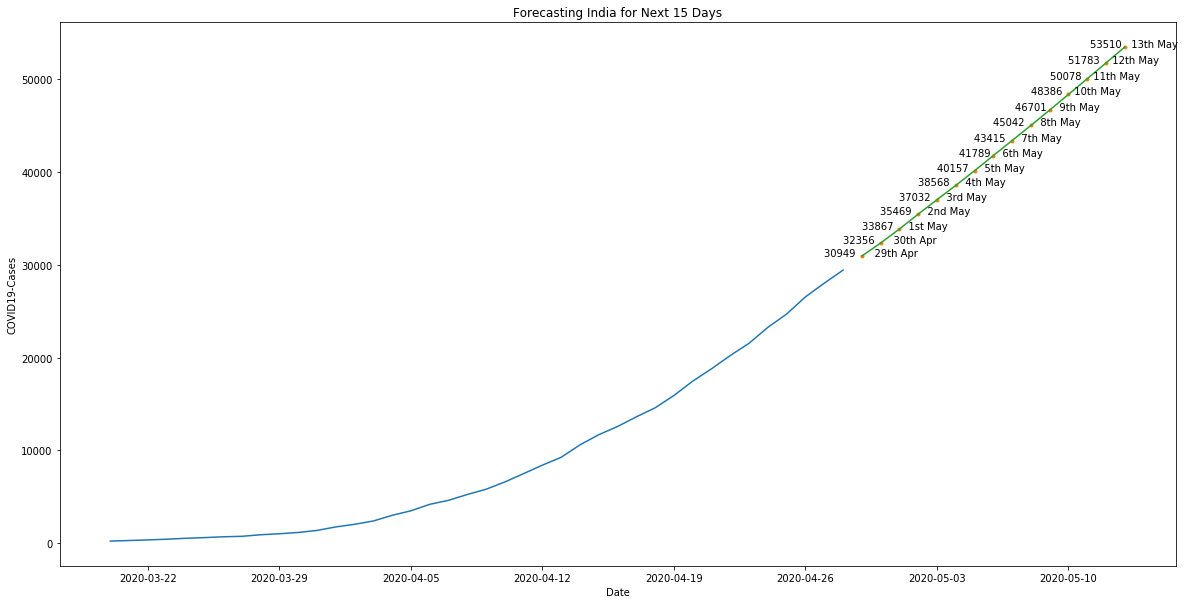

In [38]:
plt.figure(figsize=(20,10))
plt.plot(Train.Confirmed[50:], label='Data') 
plt.plot(predictions[0],"." ,label='Predicted Cases') 
plt.plot(predictions[0],label='Predicted Cases') 
#for i_x, i_y in zip(x, y):
plt.text('4/29/2020',30949, str('30949  '),horizontalalignment='right')
plt.text('4/30/2020', 32356, str('32356  '),horizontalalignment='right')
plt.text('5/1/2020', 33867, str('33867  '),horizontalalignment='right')
plt.text('5/2/2020', 35469, str('35469  '),horizontalalignment='right')
plt.text('5/3/2020',37032, str('37032  '),horizontalalignment='right')
plt.text('5/4/2020', 38568, str('38568  '),horizontalalignment='right')
plt.text('5/5/2020', 40157, str('40157  '),horizontalalignment='right')
plt.text('5/6/2020',41789, str('41789 '),horizontalalignment='right')
plt.text('5/7/2020', 43415, str('43415  '),horizontalalignment='right')
plt.text('5/8/2020',45042, str('45042  '),horizontalalignment='right')
plt.text('5/9/2020',46701, str('46701 '),horizontalalignment='right')
plt.text('5/10/2020',48386, str('48386  '),horizontalalignment='right')
plt.text('5/11/2020',50078, str('50078  '),horizontalalignment='right')
plt.text('5/12/2020',51783, str('51783  '),horizontalalignment='right')
plt.text('5/13/2020',53510, str('53510 '),horizontalalignment='right')
    
    

plt.text('4/29/2020',30949, str('    29th Apr'))
plt.text('4/30/2020',32356, str('    30th Apr'))
plt.text('5/1/2020',33867, str('   1st May'))
plt.text('5/2/2020',35469, str('   2nd May'))
plt.text('5/3/2020',37032, str('   3rd May'))
plt.text('5/4/2020',38568, str('   4th May'))
plt.text('5/5/2020',40157, str('   5th May'))
plt.text('5/6/2020',41789, str('   6th May'))
plt.text('5/7/2020',43415, str('   7th May'))
plt.text('5/8/2020',45042, str('   8th May'))
plt.text('5/9/2020',46701, str('   9th May'))
plt.text('5/10/2020',48386, str('  10th May'))
plt.text('5/11/2020',50078, str('  11th May'))
plt.text('5/12/2020',51783, str('  12th May'))
plt.text('5/13/2020',53510, str('  13th May'))  

plt.title('Forecasting India for Next 15 Days') 
plt.xlabel("Date") 
plt.ylabel("COVID19-Cases") 

plt.show()

In [ ]:
daily_log=pd.DataFrame(np.log(daily['Confirmed']))


In [49]:
daily_log= daily_log.replace([np.inf, -np.inf], 0)

In [56]:
daily_log= daily_log.Confirmed

In [66]:
daily_log=daily_log.to_frame()

In [1]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(daily_log.Confirmed,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

NameError: name 'pdq' is not defined

In [77]:
model_arima = ARIMA(daily_log.Confirmed,order=(2, 2, 3))
model_arima_fit = model_arima.fit()

In [78]:
predictions= model_arima_fit.forecast(steps=15)[0]
np.exp(predictions)

array([ 31530.66540272,  39290.19810665,  49960.86039093,  55780.33431863,
        66976.91259518,  85268.11534281,  98913.5541447 , 116825.11509679,
       147268.74577151, 175899.25399974, 207385.88796472, 258211.95187197,
       314380.72999554, 373197.18980214, 460001.41118149])

In [31]:
np.log(30949)

10.34009596741305

In [32]:
np.exp(10.34)

30946.030047045107

In [430]:
rms = sqrt(mean_squared_error(valid.Confirmed, predictions)) 
print(rms)

455.061064994478


In [154]:
predictions = pd.DataFrame(predictions, index = valid.index)

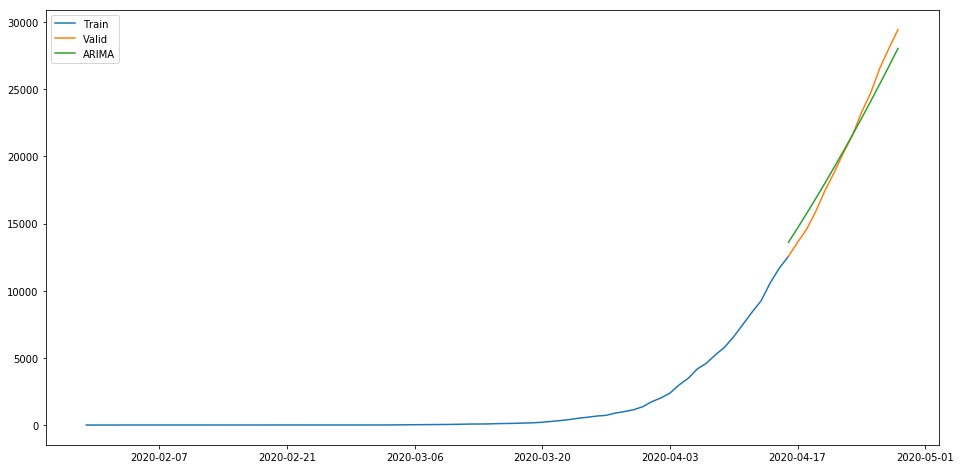

In [155]:
plt.figure(figsize=(16,8)) 
plt.plot(Train['Confirmed'], label='Train') 
plt.plot(valid['Confirmed'], label='Valid') 
plt.plot(predictions, label='ARIMA') 
plt.legend(loc='best') 
plt.show()

In [440]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    #rolmean = timeseries.rolling(50).mean()  
    #rolstd = timeseries.rolling(50).std()
    #rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    #rolstd = pd.rolling_std(timeseries, window=24)
        #Plot rolling statistics:
    #orig = plt.plot(timeseries, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    #plt.legend(loc='best')
    #plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,10

In [441]:
test_stationarity(Train['Confirmed'])

Results of Dickey-Fuller Test:
Test Statistic                  1.504408
p-value                         0.997540
#Lags Used                      2.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [445]:
Train_log = np.log(Train['Confirmed']) 
valid_log = np.log(valid['Confirmed'])
moving_avg = Train_log.rolling(10).mean() 
#plt.plot(Train_log) 
#plt.plot(moving_avg, color = 'red') 
#plt.show()

In [446]:
train_log_moving_avg_diff = Train_log - moving_avg

In [447]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -5.648428e+00
p-value                        9.988759e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


In [452]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.247487
p-value                         0.652842
#Lags Used                     10.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


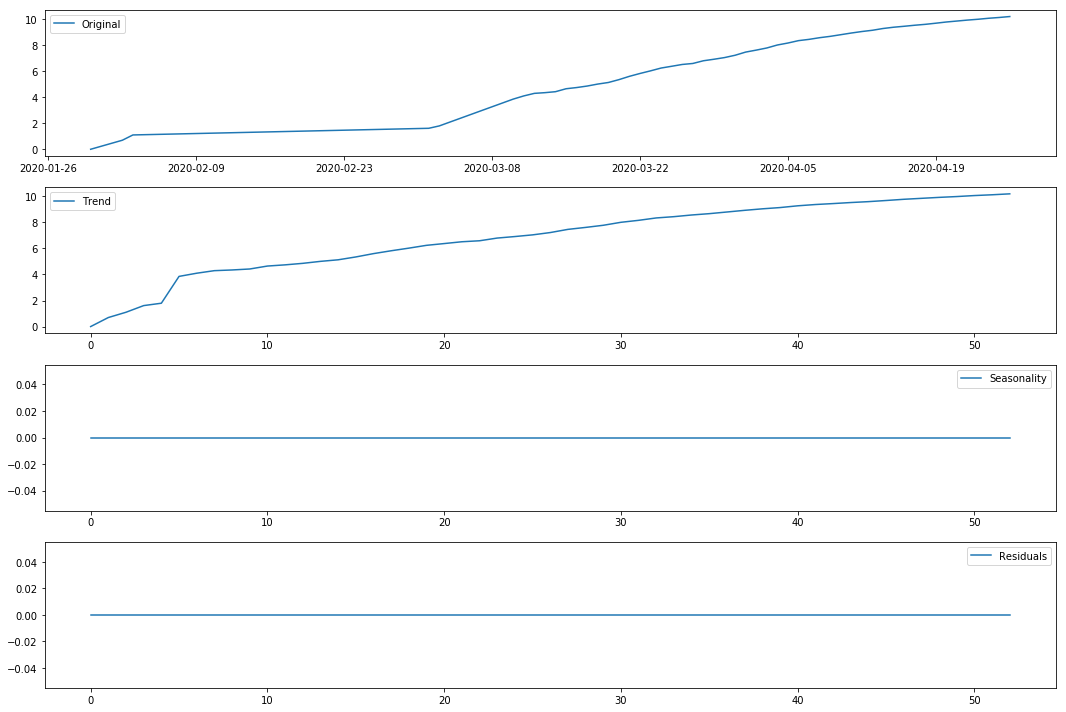

In [453]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Confirmed.values, freq = 1) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

In [454]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train_log_moving_avg_diff.dropna(),order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 21.029639900835207
(0, 0, 1) -19.495404854733465
(0, 0, 3) -71.9162878585058
(0, 0, 4) -81.75710140779458
(0, 0, 6) -98.5031634263216
(0, 0, 7) -102.52360899670259
(0, 0, 8) -106.63346174671776
(0, 0, 9) -109.71358470459603
(0, 1, 0) -84.29646972661743
(0, 1, 1) -100.66306156001862
(0, 1, 2) -106.70992074463048
(0, 1, 3) -109.00519357393189
(0, 1, 4) -115.0057342778437
(0, 1, 5) -113.00911691072854
(0, 2, 0) -108.7308097274908
(0, 2, 1) -108.59644120455661
(0, 2, 2) -106.85818825606364
(0, 2, 3) -105.09623931890204
(0, 2, 4) -104.5954619888665
(0, 2, 5) -109.2990835749255
(0, 2, 6) -107.30523837150955
(0, 2, 8) -100.65706964883148
(0, 2, 9) -99.86508286556253
(1, 0, 0) -74.10255427337503
(1, 0, 1) -92.28511079172995
(1, 0, 2) -99.91503314618043
(1, 0, 3) -102.10245227246631
(1, 0, 4) -110.25761244665884
(1, 0, 7) -109.4175448070323
(1, 1, 0) -113.09414257466948
(1, 1, 1) -111.16012231346248
(1, 1, 2) -110.22913435017016
(1, 1, 3) -103.15276143390157
(1, 1, 5) -108.75503833117

In [456]:
arima_mod6 = sm.tsa.ARIMA(train_log_moving_avg_diff.dropna(), (2,1,2)).fit(disp=False)
print(arima_mod6.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Confirmed   No. Observations:                   43
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  64.670
Method:                       css-mle   S.D. of innovations              0.049
Date:                Wed, 29 Apr 2020   AIC                           -117.339
Time:                        18:48:11   BIC                           -106.772
Sample:                    03-15-2020   HQIC                          -113.443
                         - 04-26-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0271      0.017     -1.641      0.109      -0.060       0.005
ar.L1.D.Confirmed     1.5021      0.095     15.795      0.000       1.316       1.689
ar.L2.D.Confirmed    -0.

In [457]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Confirmed'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff[0],fill_value=0)
    predict = np.exp(predict_log)
   # print(predict)
    plt.plot(given_set['Confirmed'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    rms = sqrt(mean_squared_error(given_set.Confirmed,predict)) 
    print(rms)
    plt.show()
    return predict

In [459]:
ARIMA_predict_diff=arima_mod6.forecast(steps=12)[0]
ARIMA_predict_diff=pd.Series(ARIMA_predict_diff,index=valid.index)

996.3134546918301


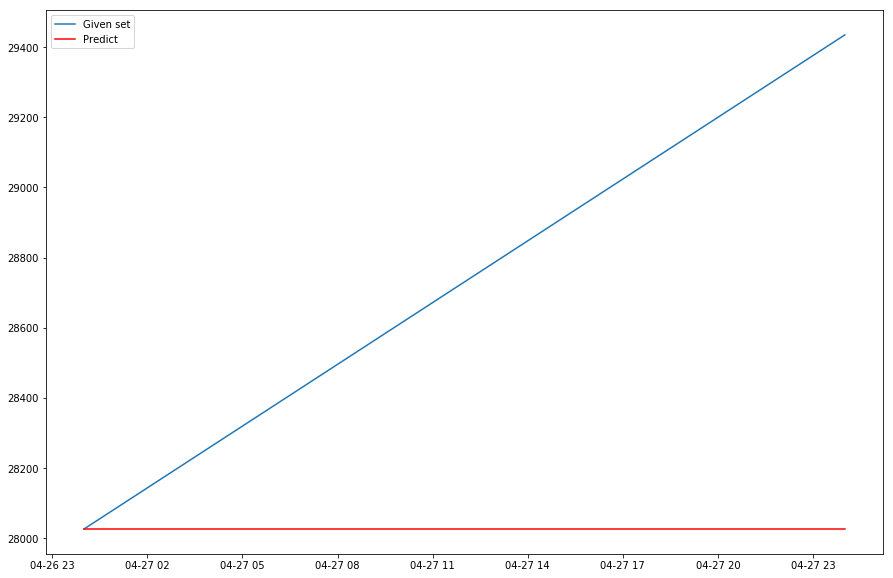

Datetime
2020-04-27    28026.0
2020-04-28    28026.0
dtype: float64

In [460]:
pre = check_prediction_diff(ARIMA_predict_diff, valid)
pre